In [1]:
import numpy as np; np.set_printoptions(precision=3)
import pandas as pd; pd.set_option('display.precision',3)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fname = 'C:\\Users\\이가은\\Desktop\\real.csv'
real = pd.read_csv(fname, index_col=0)
real.columns = ['date','house_age','dist_mrt','no_cvs','lat','long','price']
real

,date,house_age,dist_mrt,no_cvs,lat,long,price
No,,,,,,,
1,2012.917,32.0,84.879,10,24.983,121.540,37.9
2,2012.917,19.5,306.595,9,24.980,121.540,42.2
3,2013.583,13.3,561.985,5,24.987,121.544,47.3
4,2013.500,13.3,561.985,5,24.987,121.544,54.8
5,2012.833,5.0,390.568,5,24.979,121.542,43.1
...,...,...,...,...,...,...,...
410,2013.000,13.7,4082.015,0,24.942,121.504,15.4
411,2012.667,5.6,90.456,9,24.974,121.543,50.0
412,2013.250,18.8,390.970,7,24.979,121.540,40.6


In [3]:
real.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414 entries, 1 to 414
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       414 non-null    float64
 1   house_age  414 non-null    float64
 2   dist_mrt   414 non-null    float64
 3   no_cvs     414 non-null    int64  
 4   lat        414 non-null    float64
 5   long       414 non-null    float64
 6   price      414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 25.9 KB


In [4]:
real.sort_values(by=['price'], inplace=True)
real.reset_index(inplace=True)
real = real.drop(['No'], axis=1)
real

,date,house_age,dist_mrt,no_cvs,lat,long,price
0,2013.333,14.8,393.261,6,24.962,121.538,7.6
1,2013.583,17.4,6488.021,1,24.957,121.474,11.2
2,2012.750,16.0,4066.587,0,24.943,121.503,11.6
3,2013.000,30.9,6396.283,1,24.944,121.479,12.2
4,2013.083,32.0,1156.777,0,24.949,121.530,12.8
...,...,...,...,...,...,...,...
409,2012.833,0.0,292.998,6,24.977,121.545,71.0
410,2013.417,0.0,292.998,6,24.977,121.545,73.6
411,2013.583,35.4,318.529,9,24.971,121.541,78.0
412,2013.333,37.2,186.510,9,24.977,121.543,78.3


In [6]:
real.describe()

,date,house_age,dist_mrt,no_cvs,lat,long,price
count,414.000,414.000,414.000,414.000,414.000,414.000,414.000
mean,2013.149,17.713,1083.886,4.094,24.969,121.533,37.980
std,0.282,11.392,1262.110,2.946,0.012,0.015,13.606
min,2012.667,0.000,23.383,0.000,24.932,121.474,7.600
25%,2012.917,9.025,289.325,1.000,24.963,121.528,27.700
50%,2013.167,16.100,492.231,4.000,24.971,121.539,38.450
75%,2013.417,28.150,1454.279,6.000,24.977,121.543,46.600
max,2013.583,43.800,6488.021,10.000,25.015,121.566,117.500


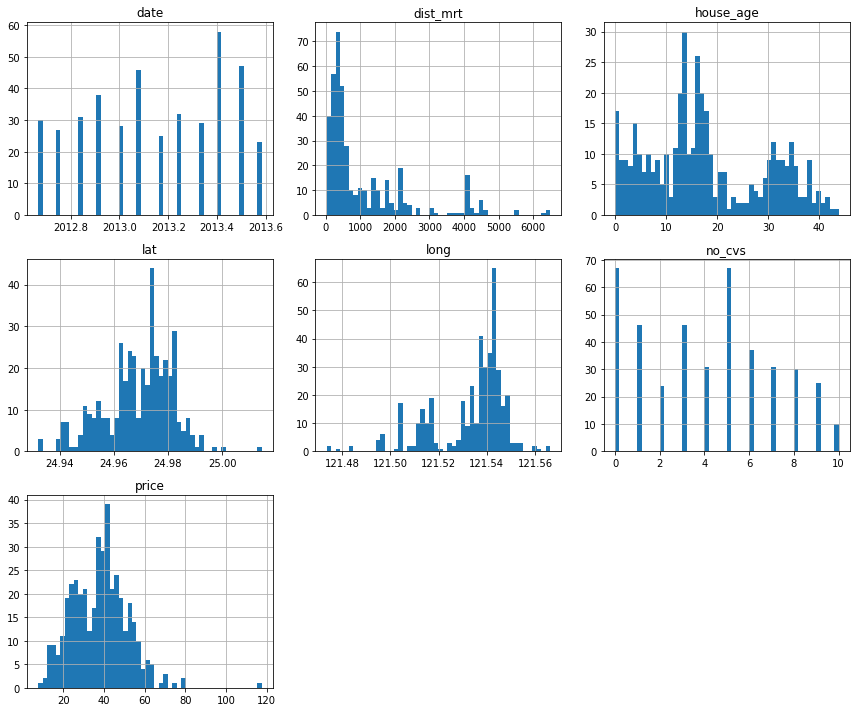

In [7]:
real.hist(bins=50, figsize=(12,10))
plt.tight_layout()

In [8]:
np.percentile(real.price, 99.5)

77.71400000000001

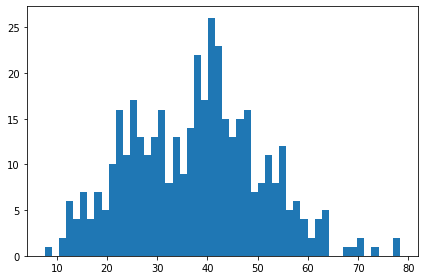

In [9]:
real = real[real.price < 80]
plt.hist(real.price, bins=50)
plt.tight_layout()

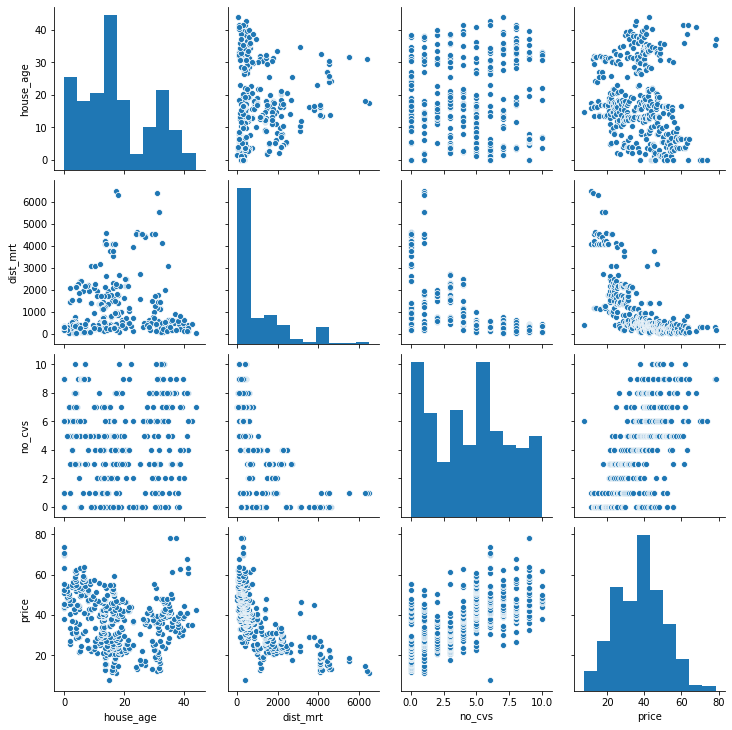

In [10]:
sns.pairplot(real[['house_age', 'dist_mrt','no_cvs','price']])

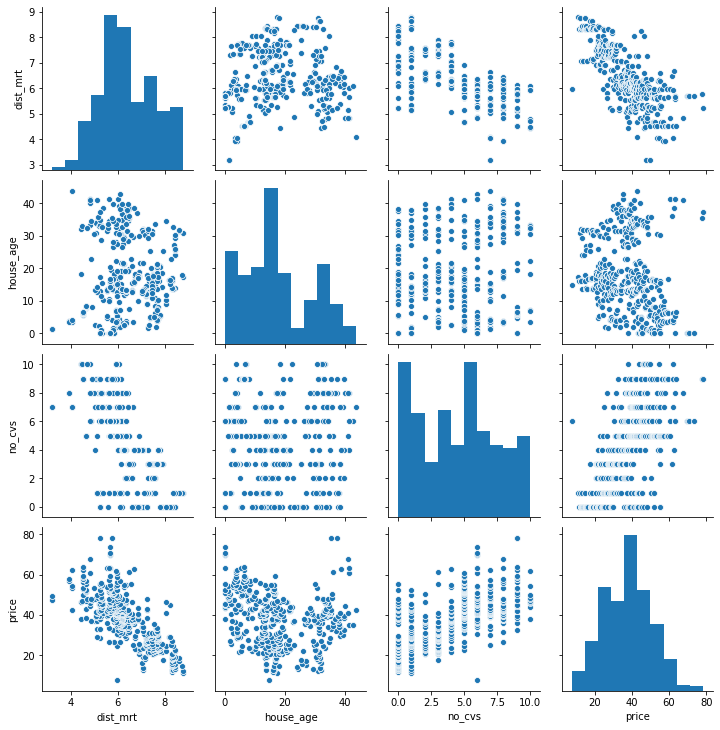

In [11]:
real2 = real.copy()
real2['dist_mrt'] = np.log(1+real.dist_mrt)
sns.pairplot(real2[['dist_mrt', 'house_age','no_cvs','price']])

In [18]:
data = real2
data

,date,house_age,dist_mrt,no_cvs,lat,long,price
0,2013.333,14.8,5.977,6,24.962,121.538,7.6
1,2013.583,17.4,8.778,1,24.957,121.474,11.2
2,2012.750,16.0,8.311,0,24.943,121.503,11.6
3,2013.000,30.9,8.764,1,24.944,121.479,12.2
4,2013.083,32.0,7.054,0,24.949,121.530,12.8
...,...,...,...,...,...,...,...
408,2013.250,0.0,5.684,6,24.977,121.545,70.1
409,2012.833,0.0,5.684,6,24.977,121.545,71.0
410,2013.417,0.0,5.684,6,24.977,121.545,73.6
411,2013.583,35.4,5.767,9,24.971,121.541,78.0


In [27]:
X = data.iloc[:,1:4]
y = data.iloc[:, -1]
X

,house_age,dist_mrt,no_cvs
0,14.8,5.977,6
1,17.4,8.778,1
2,16.0,8.311,0
3,30.9,8.764,1
4,32.0,7.054,0
...,...,...,...
408,0.0,5.684,6
409,0.0,5.684,6
410,0.0,5.684,6
411,35.4,5.767,9


In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.3, random_state=0)

In [41]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)

def Scl_train(sclr, df):
    colnames = df.columns
    df = sclr.transform(df)
    df = pd.DataFrame(df)
    df.set_axis(colnames, axis=1, inplace=True)
    return df

In [49]:
X_train_sc = scaler.transform(X_train)
X_train_sc

array([[-1.568e+00, -5.940e-01,  5.690e-01],
       [-1.568e+00, -4.628e-01,  1.595e+00],
       [ 1.471e+00, -6.586e-01,  2.271e-01],
       [ 1.822e+00,  3.161e-01, -1.148e-01],
       [ 1.102e+00,  1.009e+00, -7.985e-01],
       [-1.401e+00, -3.788e-01,  9.109e-01],
       [-2.065e-01,  3.286e-01, -1.148e-01],
       [ 3.380e-01, -1.802e-01,  1.595e+00],
       [-1.568e+00, -1.005e+00, -1.482e+00],
       [-2.855e-01, -4.621e-01, -1.140e+00],
       [ 8.912e-01, -3.776e-01,  5.690e-01],
       [ 1.032e+00, -5.091e-02,  1.253e+00],
       [-1.568e+00, -1.005e+00, -1.482e+00],
       [-4.699e-01,  6.338e-01, -1.148e-01],
       [-8.826e-01, -1.517e+00,  2.271e-01],
       [-1.713e-01,  8.764e-01, -4.566e-01],
       [-5.718e-02, -9.856e-01,  1.253e+00],
       [ 1.199e+00, -7.077e-01,  1.595e+00],
       [-1.023e+00,  1.110e+00, -1.140e+00],
       [-3.470e-01,  1.781e+00, -1.482e+00],
       [-1.568e+00, -5.940e-01,  5.690e-01],
       [ 1.796e+00, -2.285e-01, -1.482e+00],
       [-8

In [51]:
X_test_sc = scaler.transform(X_test)
X_test_sc

array([[-1.568, -1.005, -1.482],
       [-0.154,  0.329, -0.115],
       [-0.084,  0.482, -0.115],
       [ 1.453, -1.347,  1.253],
       [-0.119, -0.504,  0.569],
       [-1.234, -0.351,  0.227],
       [ 0.118, -0.186,  0.227],
       [ 1.216,  0.646, -1.482],
       [-0.101,  1.781, -1.482],
       [ 1.365, -0.998,  0.569],
       [-0.4  , -0.007,  0.227],
       [-0.022,  0.352, -1.482],
       [ 1.488, -1.054,  1.253],
       [-1.568, -1.005, -1.482],
       [-0.127, -0.605,  0.227],
       [-0.663,  1.527, -1.482],
       [-0.084, -0.389,  1.253],
       [ 0.926,  0.077, -0.457],
       [ 0.54 ,  1.875, -1.482],
       [-0.013, -0.432, -1.14 ],
       [-0.303, -1.083, -1.14 ],
       [-0.084,  1.778, -1.482],
       [-0.698, -0.637,  0.911],
       [ 1.093,  1.871, -1.14 ],
       [-0.944,  1.213, -0.457],
       [-0.373, -0.127,  0.227],
       [ 1.242, -1.705,  1.937],
       [-1.568, -0.594,  0.569],
       [-0.145, -0.605,  0.227],
       [ 1.348, -1.383,  1.937],
       [-0

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [56]:
def Poly_Reg(X_train, y_train, X_test, y_test, m, fig=False):
    # Feature Extraction
    poly = PolynomialFeatures(degree=m)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.fit_transform(X_test)

    # LR Fitting
    lin = LinearRegression(fit_intercept=False)
    lin.fit(X_train_poly, y_train)
    y_train_pred = lin.predict(X_train_poly)
    y_test_pred = lin.predict(X_test_poly)

    # Compue MSE
    train_MSE = np.sqrt(np.linalg.norm(y_train - y_train_pred)**2/y_train.shape[0])
    test_MSE = np.sqrt(np.linalg.norm(y_test - y_test_pred)**2/y_test.shape[0])

    # Residual
    Resid = y_train - y_train_pred
    
    return {'coef':lin.coef_, 'train_MSE':train_MSE, 'test_MSE':test_MSE, 'Resid':Resid}

In [57]:
PRmodel = Poly_Reg(X_train_sc, y_train, X_test_sc, y_test, 2, fig=True)
PRmodel

{'coef': array([37.575, -3.319, -7.205,  1.682,  3.028,  1.261,  0.336, -3.74 ,
        -3.749, -1.35 ]),
 'train_MSE': 7.367213373748201,
 'test_MSE': 7.934684855902733,
 'Resid': array([ 1.516e+01, -9.941e+00, -1.523e+01,  2.339e+01, -2.536e+00,
        -1.180e+01,  1.930e+00,  3.595e+00,  9.799e-02, -9.426e+00,
         5.197e-01, -8.255e-01,  9.898e+00,  6.612e-01, -1.001e+01,
        -5.732e+00,  1.194e+00, -7.923e+00, -2.676e-01,  9.069e+00,
         1.426e+01,  3.711e+00,  7.723e+00, -2.655e+00, -7.696e-01,
         2.790e+00, -1.963e+00,  1.353e+00, -2.546e+00, -7.717e-01,
        -8.593e-01,  4.195e+00,  3.463e+00, -5.975e+00,  9.794e+00,
        -2.083e+00,  1.798e+00,  1.782e+01, -2.316e+00,  1.030e+00,
         4.164e+00, -1.359e+01, -1.245e+00, -2.480e+00, -2.805e+00,
         9.894e+00,  1.894e+00,  2.599e+00,  1.663e+00,  1.375e+00,
         1.270e+00,  6.325e+00, -2.429e+00, -1.263e+01, -4.559e+00,
        -9.123e+00, -3.432e+00, -6.666e+00,  7.462e+00,  1.441e+01,
    

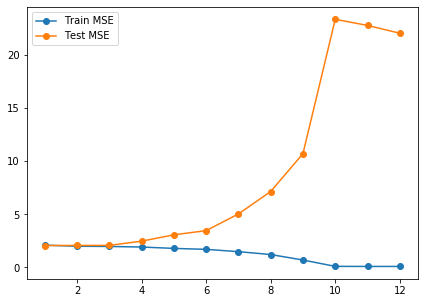

In [59]:
output = pd.DataFrame(columns=['d','Train MSE','Test MSE'])
for i in np.arange(12):
    m = i+1
    Reg = Poly_Reg(X_train_sc, y_train, X_test_sc, y_test, m, fig=False)
    output.loc[i] = [m, Reg['train_MSE'], Reg['test_MSE']]


fig, ax = plt.subplots(figsize=(7,5))
ax.plot(output['d'], np.log(output['Train MSE']), 'o-', label='Train MSE')
ax.plot(output['d'], np.log(output['Test MSE']), 'o-', label='Test MSE')

ax.legend()

In [60]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [61]:
poly = PolynomialFeatures(degree=2)
Phi_train = poly.fit_transform(X_train_sc)
Phi_test = poly.fit_transform(X_test_sc)
print(Phi_train.shape)
print(Phi_test.shape)

(289, 10)
(124, 10)


In [62]:
from sklearn.linear_model import Ridge
alphas=np.logspace(-6, 6, 500)

In [63]:
def Ridge_Reg(Phi_train, Y_train, Phi_test, Y_test, alphas, fig=False):
    
    ## How to Ridge?##
    #1. Call Ridge function as an object
    reg = Ridge()
    
    coefs = []
    train_MSE = []
    test_MSE = []
    
    for a in alphas:
        #2. Choose your lambda (Regularization coefficient)
        reg.set_params(alpha=a)
        
        #3. Fit your model
        reg.fit(Phi_train, Y_train)
        
        #4 view result with reg.coef_, reg.predict, ...
        coefs.append(reg.coef_)
    
        train_pred = reg.predict(Phi_train)
        train_MSE.append(mean_squared_error(Y_train, train_pred))
    
        test_pred = reg.predict(Phi_test)
        test_MSE.append(mean_squared_error(Y_test, test_pred))
   
    ## just for plotting purpose.. trivial ##
    #print(np.array(coefs).shape)
    
    if fig==True:
        fig = plt.figure(figsize=(14,6))

        ax1 = fig.add_subplot(121)
        labels = ['X%d'%i for i in range(Phi_train.shape[1])]
        for i in range(Phi_train.shape[1]):
            ax1.plot(alphas, np.array(coefs)[:,i], label=labels[i])
        ax1.set_xscale('log')
        ax1.axvline(x=alphas[np.argmin(test_MSE)], linestyle='--', color='grey')
        ax1.legend()

        ax2 = fig.add_subplot(122)
        ax2.plot(alphas, train_MSE, label='Train MSE')
        ax2.plot(alphas, test_MSE, label='Test MSE')
        ax2.set_xscale('log')
        ax2.axvline(x=alphas[np.argmin(test_MSE)], linestyle='--', color='grey')
        alpha = np.around(alphas[np.argmin(test_MSE)],3)
        ax2.text(alphas[np.argmin(test_MSE)], np.amin(test_MSE), 'alpha={0}'.format(alpha), size=15)
        ax2.legend()

        print("Weight:" ,coefs[np.argmin(test_MSE)])
        
    return {'coefs': coefs, 'train_MSE': train_MSE, 'test_MSE': test_MSE}

Weight: [ 0.    -3.097 -6.334  2.39   2.83   0.868 -0.023 -2.649 -2.033 -0.787]


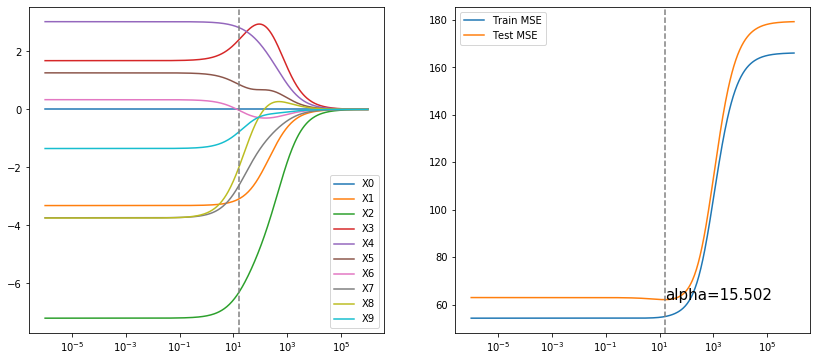

In [64]:
Ridge_output = Ridge_Reg(Phi_train, y_train, Phi_test, y_test, alphas, fig=True)

In [65]:
from sklearn.linear_model import Lasso
alphas=np.logspace(-6, 6, 500)

In [66]:
def Lasso_Reg(Phi_train, Y_train, Phi_test, Y_test, alphas, fig=False):
    
    ## How to Lasso?##
    #1. Call Lasso function as an object
    reg = Lasso()
    
    coefs = []
    train_MSE = []
    test_MSE = []
    
    for a in alphas:
        #2. Choose your lambda (Regularization coefficient)
        reg.set_params(alpha=a)
        
        #3. Fit your model
        reg.fit(Phi_train, Y_train)
        
        #4 view result with reg.coef_, reg.predict, ...
        coefs.append(reg.coef_)
    
        train_pred = reg.predict(Phi_train)
        train_MSE.append(mean_squared_error(Y_train, train_pred))
    
        test_pred = reg.predict(Phi_test)
        test_MSE.append(mean_squared_error(Y_test, test_pred))
    
    ## just for plotting purpose.. trivial ##
    #print(np.array(coefs).shape)
    if fig==True:
        fig = plt.figure(figsize=(14,6))

        ax1 = fig.add_subplot(121)
        labels = ['X%d'%i for i in range(Phi_train.shape[1])]
        for i in range(Phi_train.shape[1]):
            ax1.plot(alphas, np.array(coefs)[:,i], label=labels[i])
        ax1.set_xscale('log')
        ax1.axvline(x=alphas[np.argmin(test_MSE)], linestyle='--', color='grey')
        ax1.legend()

        ax2 = fig.add_subplot(122)
        ax2.plot(alphas, train_MSE, label='Train MSE')
        ax2.plot(alphas, test_MSE, label='Test MSE')
        ax2.set_xscale('log')
        ax2.axvline(x=alphas[np.argmin(test_MSE)], linestyle='--', color='grey')
        alpha = np.around(alphas[np.argmin(test_MSE)],3)
        ax2.text(alphas[np.argmin(test_MSE)], np.amin(test_MSE), 'alpha={0}'.format(alpha), size=15)
        ax2.legend()

        print("Weight:" ,coefs[np.argmin(test_MSE)])
        
    return {'coefs': coefs, 'train_MSE': train_MSE, 'test_MSE': test_MSE}

Weight: [ 0.    -2.975 -6.567  2.313  2.554  0.273 -0.132 -1.79  -0.703 -0.144]


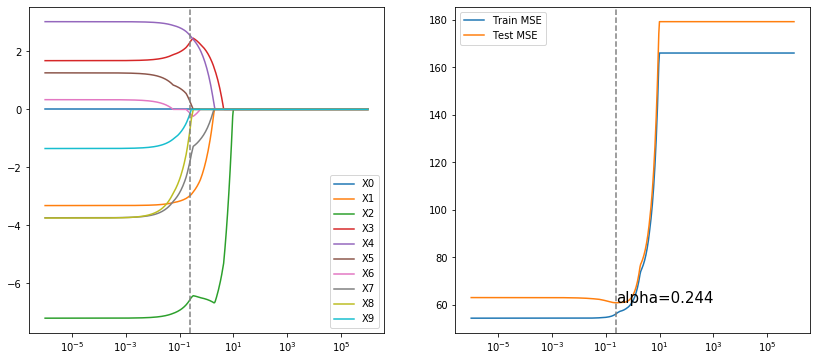

In [67]:
Lasso_output = Lasso_Reg(Phi_train, y_train, Phi_test, y_test, alphas, fig=True)

In [69]:
import numpy as np
from sklearn.model_selection import KFold

kcv = KFold(n_splits=5, shuffle=True)

kcvMSE_Ridge = np.zeros((kcv.get_n_splits(), alphas.size))
kcvMSE_Lasso = np.zeros((kcv.get_n_splits(), alphas.size))

i = 0
for train_index, test_index in kcv.split(Phi_train, y_train):
    print("TRAIN:", train_index.shape, "TEST:", test_index.shape)
    CV_Phi_train, CV_Phi_test = Phi_train[train_index,:], Phi_train[test_index,:]
    CV_y_train, CV_y_test = y_train[train_index], y_train[test_index]
    
    Ridge_output = Ridge_Reg(CV_Phi_train, CV_y_train, CV_Phi_test, CV_y_test, alphas, fig=False)
    kcvMSE_Ridge[i, :] = Ridge_output['test_MSE']
    
    Lasso_output = Lasso_Reg(CV_Phi_train, CV_y_train, CV_Phi_test, CV_y_test, alphas, fig=False)
    kcvMSE_Lasso[i, :] = Lasso_output['test_MSE']
    i += 1

TRAIN: (231,) TEST: (58,)
TRAIN: (231,) TEST: (58,)
TRAIN: (231,) TEST: (58,)
TRAIN: (231,) TEST: (58,)
TRAIN: (232,) TEST: (57,)


Weight: [ 0.    -3.483 -7.242  1.942  2.727  1.125  0.264 -3.569 -3.591 -1.459]


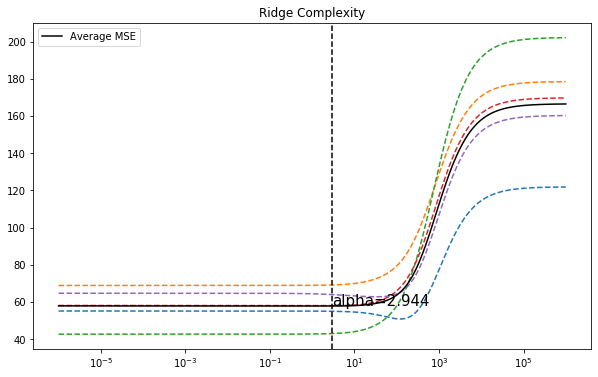

In [70]:
fig, ax= plt.subplots(figsize=(10,6))
meanMSE = np.apply_along_axis(np.mean, 1, kcvMSE_Ridge.T)
ax.plot(alphas, kcvMSE_Ridge.T, linestyle='--')
ax.plot(alphas, meanMSE, color='black', label='Average MSE')
ax.set_xscale('log')
ax.axvline(x=alphas[np.argmin(meanMSE)], linestyle='--', color='black')
alpha = np.around(alphas[np.argmin(meanMSE)],3)
ax.text(alphas[np.argmin(meanMSE)], np.amin(meanMSE), 'alpha={0}'.format(alpha), size=15)
ax.set_title('Ridge Complexity')
ax.legend()

coefs = Ridge_output['coefs']
print("Weight:" ,coefs[np.argmin(meanMSE)])
Ridge_alphas = [alphas[np.argmin(meanMSE)]]

Weight: [ 0.    -3.463 -7.406  1.84   2.683  0.948  0.127 -3.523 -3.537 -1.404]


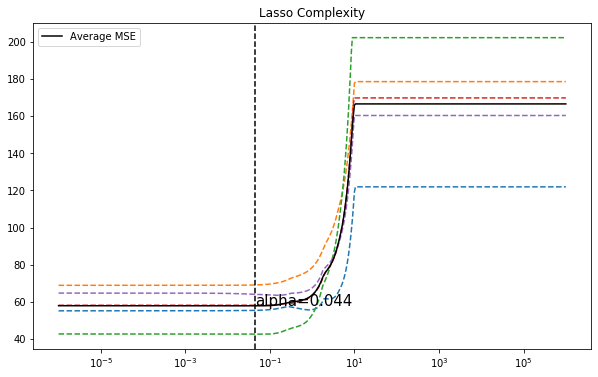

In [71]:
fig, ax= plt.subplots(figsize=(10,6))
meanMSE = np.apply_along_axis(np.mean, 1, kcvMSE_Lasso.T)
ax.plot(alphas, kcvMSE_Lasso.T, linestyle='--')
ax.plot(alphas, meanMSE, color='black', label='Average MSE')
ax.set_xscale('log')
ax.axvline(x=alphas[np.argmin(meanMSE)], linestyle='--', color='black')
alpha = np.around(alphas[np.argmin(meanMSE)],3)
ax.text(alphas[np.argmin(meanMSE)], np.amin(meanMSE), 'alpha={0}'.format(alpha), size=15)
ax.set_title('Lasso Complexity')
ax.legend()

coefs = Lasso_output['coefs']
print("Weight:" ,coefs[np.argmin(meanMSE)])
Lasso_alphas = [alphas[np.argmin(meanMSE)]]

In [72]:
print("coef :" , PRmodel['coef'])
print("test MSE :",PRmodel['test_MSE'])

coef : [37.575 -3.319 -7.205  1.682  3.028  1.261  0.336 -3.74  -3.749 -1.35 ]
test MSE : 7.934684855902733


In [73]:
Ridge_output = Ridge_Reg(Phi_train, y_train, Phi_test, y_test, Ridge_alphas, fig=False)
print("alpha :", Ridge_alphas)
print("coef :" , Ridge_output['coefs'])
print("test_MSE :", Ridge_output['test_MSE'])

alpha : [2.944000475100034]
coef : [array([ 0.   , -3.275, -6.984,  1.878,  2.984,  1.142,  0.232, -3.443,
       -3.278, -1.193])]
test_MSE : [62.56595260013481]


In [74]:
Lasso_output = Lasso_Reg(Phi_train, y_train, Phi_test, y_test, Lasso_alphas, fig=False)
print("alpha :", Lasso_alphas)
print("coef :" , Lasso_output['coefs'])
print("test_MSE :", Lasso_output['test_MSE'])

alpha : [0.04378068629038166]
coef : [array([ 0.   , -3.243, -7.078,  1.84 ,  2.929,  0.942,  0.081, -3.312,
       -3.099, -1.103])]
test_MSE : [62.35529158351621]


In [75]:
#test_MSE는 polynomial basis가 가장 낮음. 따라서 이것이 선택됨. 선형보다 굴곡이 많은 data라 그런가...?